## MSDS 452
## Assignment 9b
# I. Data Network Analysis of Twitter Data

In [1]:
import math, twitter, re, string, copy, itertools, pickle, datetime, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
from collections import Counter, OrderedDict
import operator
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk import bigrams 
import tools as tool
# import community
from wordcloud import WordCloud
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

#### Loading the Dataframe

In [2]:
st="Fresno Bee" #"Climate Change"
gname=st
stc=st.replace(" ","")
plname1=stc+"_df.pic" 
mt = pd.read_pickle(plname1)
mt=mt.drop(mt[mt.twitter_id==1094622889054212096].index)
mt=mt.drop(mt[mt.twitter_id==1094416919288037376].index)
mt=mt.drop(mt[mt.twitter_id==1094744351803170816].index)
mt=mt.sort_values(by='created_at')
mt.head()

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
1813,1113977205602705409,Fri Apr 05 01:30:37 +0000 2019,pops131,NaN,NaN,en,Video catches Fresno CA thief hiding chainsaw ...,2019-04-05 01:30:37
1812,1113977907649449985,Fri Apr 05 01:33:24 +0000 2019,HannahBP2,[Fresno],NaN,en,Doing some research at Fresno Public Library d...,2019-04-05 01:33:24
1811,1113980334973030401,Fri Apr 05 01:43:03 +0000 2019,pops131,NaN,NaN,en,Former Fresno CA teacher testifies in student ...,2019-04-05 01:43:03
1810,1113992971567882240,Fri Apr 05 02:33:16 +0000 2019,MySpecialAngelz,NaN,[DogginTrump],en,RT @DogginTrump: How dare you people keep send...,2019-04-05 02:33:16
1809,1114009099274862594,Fri Apr 05 03:37:21 +0000 2019,umbrios,NaN,[DogginTrump],en,RT @DogginTrump: How dare you people keep send...,2019-04-05 03:37:21


In [3]:
lh=[]
for i in mt["hashtags_list"].tolist():
    if type(i)==list: #!=float:
        t=[]
        for ii in i:
            ii=ii.lower()
            t.append(ii)
        lh.append(t)
    else:
        lh.append([])
lh
mt["hashtags_list"]=lh
# mt #.head()
evd=mt['created_at']
evd=pd.to_datetime(evd)
mt['date']=evd
mt=mt.sort_values(by="date")
mt

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
2168,1112057447105986560,Sat Mar 30 18:22:11 +0000 2019,RichdeGive,[],"[TheAndyKatz, SJSU]",en,@TheAndyKatz @SJSU Keep thinking about how muc...,2019-03-30 18:22:11
2167,1112089847576100865,Sat Mar 30 20:30:55 +0000 2019,TraffickStop101,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-30 20:30:55
2166,1112090058675372033,Sat Mar 30 20:31:46 +0000 2019,VOL4KIDS,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-30 20:31:46
2165,1112093559065317378,Sat Mar 30 20:45:40 +0000 2019,overbeingnice,[],[DogginTrump],en,RT @DogginTrump: How dare you people keep send...,2019-03-30 20:45:40
2164,1112208787241385986,Sun Mar 31 04:23:33 +0000 2019,VOL4KIDS,[],NaN,en,Sex slaves live among us in Fresno. Mayor’s ne...,2019-03-31 04:23:33
2163,1112220626377334784,Sun Mar 31 05:10:36 +0000 2019,DebraTheis,[],[VOL4KIDS],en,RT @VOL4KIDS: Sex slaves live among us in Fres...,2019-03-31 05:10:36
2162,1112227158028513280,Sun Mar 31 05:36:33 +0000 2019,YankeesNewsFeed,[],NaN,en,Aaron Judge is officially larger than life. An...,2019-03-31 05:36:33
2161,1112300639126614016,Sun Mar 31 10:28:32 +0000 2019,ShoresConnect,[],NaN,en,St Clair Shores: Ypsilanti Lincoln’s Bates AP...,2019-03-31 10:28:32
2160,1112310198151143425,Sun Mar 31 11:06:31 +0000 2019,VOL4KIDS,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-31 11:06:31
2159,1112311181404975104,Sun Mar 31 11:10:26 +0000 2019,TraffickStop101,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-31 11:10:26


In [4]:
mind=mt.date.min().strftime("%d-%m-%Y %H:%M:%S")
maxd=mt.date.max().strftime("%d-%m-%Y %H:%M:%S")
# print mind
# print maxd
print "The", st, "dataframe contains", len(mt), "tweets", "from", mind, "to", maxd

The Fresno Bee dataframe contains 2169 tweets from 30-03-2019 18:22:11 to 09-04-2019 11:26:15


## 1. Counting Tweets, Tweeple, Hashtags and Mentions

In [5]:
def flis(list):
    return [i for sl in list for i in sl]

In [6]:
list=[mt["hashtags_list"].tolist()[i] for i in range(len(mt))]
hashtags=set(flis(list))
print "Totally there are %i hashtags in %i tweets" %(len(hashtags),len(mt))

Totally there are 38 hashtags in 2169 tweets


In [7]:
print len(mt), "tweets"  
senders=set(mt["screen_name"].tolist())
print len(senders), "senders"
hashtags=set([i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl])
print len(hashtags), "hashtags in tweets"
mm=[mt["mentions_list"].tolist()[i] for i in range(len(mt))]
mmm=[]
for i in mm:
    if type(i)==float:
        mmm.append([])
    else:
        mmm.append(i)
mentions=set([i for sl in mmm for i in sl])
print len(mentions), "mentions in tweets"
languages=set([mt["lang"].tolist()[i] for i in range(len(mt))])  
print len(mt), "tweets"
print len(languages), "languages in tweets"

2169 tweets
1934 senders
38 hashtags in tweets
233 mentions in tweets
2169 tweets
8 languages in tweets


In [8]:
dd={}
dd["all_tweets"]=[len(mt),len(senders),len(hashtags),len(mentions),len(languages)] #,len(retweets)
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_tweets', 0: 'tweets',1:"senders",2:"hashtags",3:"mentions",5:"languages"}, inplace=True) #4:"retweets",
df

,all_tweets,tweets,senders,hashtags,mentions,4
0,all_tweets,2169,1934,38,233,8


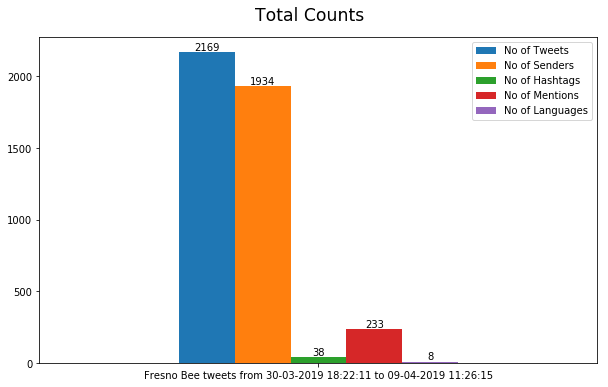

In [9]:
ax=df.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["No of Tweets", "No of Senders","No of Hashtags","No of Mentions","No of Languages"]); 
labels=[st+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [10]:
print len(mt), "tweets"
print
uh=0
vh=0
for i in range(len(mt)):
    hl=mt.iloc[i]["hashtags_list"]
    if len(hl)==0:
        vh+=1
    else:
        uh+=1
print uh, "tweets without any hashtags"
print "%i tweets with at least one hashtag (%.1f%%)" %(vh, vh*100./len(mt))
print
um=0
vm=0
lum=[]
for i in range(len(mt)):
    ml=mt.iloc[i]["mentions_list"]
    if ml==[]: #len(ml)==0:
        vm+=1
    elif type(ml)==float:
        vm+=1
    else:
        s=mt.iloc[i]["screen_name"]
        lum.append(s)
        um+=1
print vm, "tweets without any mentions"
print "%i tweets with at least one mention (%.1f%%)" %(um, um*100./len(mt))
print len(lum)
print "%i multiple senders in the %i tweets with at least one mention" %(len(lum), um)
print "%i unique senders in the %i tweets with at least one mention" %(len(set(lum)), um)

2169 tweets

115 tweets without any hashtags
2054 tweets with at least one hashtag (94.7%)

337 tweets without any mentions
1832 tweets with at least one mention (84.5%)
1832
1832 multiple senders in the 1832 tweets with at least one mention
1668 unique senders in the 1832 tweets with at least one mention


In [11]:
dd={}
dd["hashtags"]=[uh*100./len(mt),vh*100./len(mt)]
dd["mentions"]=[um*100./len(mt),vm*100./len(mt)]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_tweets', 0:"Percentage of Tweets without Hashtags/Mentions",1:"Percentage of Tweets with Hashtags/Mentions"}, inplace=True) #/Retweets
df=df.reindex([1, 0]) 
df

,all_tweets,Percentage of Tweets without Hashtags/Mentions,Percentage of Tweets with Hashtags/Mentions
1,hashtags,5.301982,94.698018
0,mentions,84.462886,15.537114


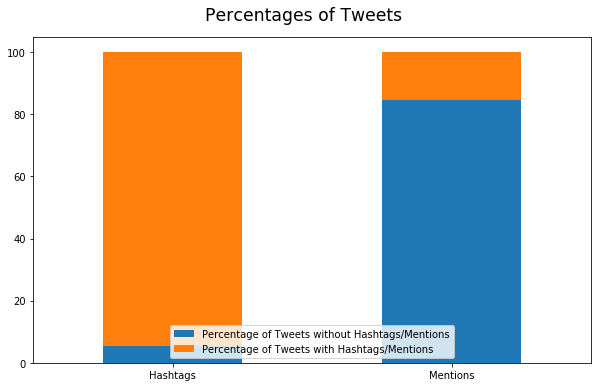

In [12]:
ax=df.plot.bar(stacked=True,figsize=(10,6),rot=0); 
labels=["Hashtags","Mentions"] 
ax.set_xticklabels(labels, rotation=0);
plt.legend(loc=8);
plt.suptitle('Percentages of Tweets', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [13]:
# mt["mentions_list"]=mmm
mel=[t for t in mt["mentions_list"].tolist() if type(t)!=float]

In [14]:
print len(senders), "senders"
print

uh=0
vh=0
for i in senders:
    df=mt.loc[mt['screen_name'] == i]
    if len(set(flis(df['hashtags_list'].values)))==0:
        uh+=1
    else:
        vh+=1
print uh, "senders without any hashtags"
print "%i senders with at least one hashtag (%.1f%%)" %(vh, vh*100./len(senders))
print "senders without any hashtags + senders with at least one hashtag =", uh+vh
print

mentioned_tweeple=set(flis([t for t in mt["mentions_list"].tolist() if type(t)!=float])) 
mu_mentioned_tweeple=flis([t for t in mt["mentions_list"].tolist() if type(t)!=float])
print len(mu_mentioned_tweeple),"multiple mentioned tweeple"
um=len(senders)-len(mentioned_tweeple.intersection(senders))
print um, "senders without any mentions"
vm=len(mentioned_tweeple.intersection(senders))
print "%i senders with at least one mention (%.1f%%)" %(vm, vm*100./len(senders))
print "senders without any mentions + senders with at least one mention =", len(senders)-len(mentioned_tweeple.intersection(senders)) + vm
lvm=[t for t in mentioned_tweeple if t not in mentioned_tweeple.intersection(senders)]
print len(lvm)
nvm=len(mentioned_tweeple)-len(mentioned_tweeple.intersection(senders))
print nvm, "mentioned tweeple being non-senders"
print vm+len(mentioned_tweeple)-len(mentioned_tweeple.intersection(senders)), "total no of mentioned tweeple (senders with at least one mention + mentioned tweeple being non-senders)"

1934 senders

1827 senders without any hashtags
107 senders with at least one hashtag (5.5%)
senders without any hashtags + senders with at least one hashtag = 1934

2057 multiple mentioned tweeple
1803 senders without any mentions
131 senders with at least one mention (6.8%)
senders without any mentions + senders with at least one mention = 1934
102
102 mentioned tweeple being non-senders
233 total no of mentioned tweeple (senders with at least one mention + mentioned tweeple being non-senders)


In [15]:
dd={}
dd["hashtags"]=[uh*100./len(senders),vh*100./len(senders)]
dd["mentions"]=[um*100./len(senders),vm*100./len(senders)]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_senders', 0:"Percentage of Senders without Hashtags/Mentions",1:"Percentage of Senders with Hashtags/Mentions"}, inplace=True) #/Retweets
df=df.reindex([1, 0])  
df    

,all_senders,Percentage of Senders without Hashtags/Mentions,Percentage of Senders with Hashtags/Mentions
1,hashtags,94.467425,5.532575
0,mentions,93.226474,6.773526


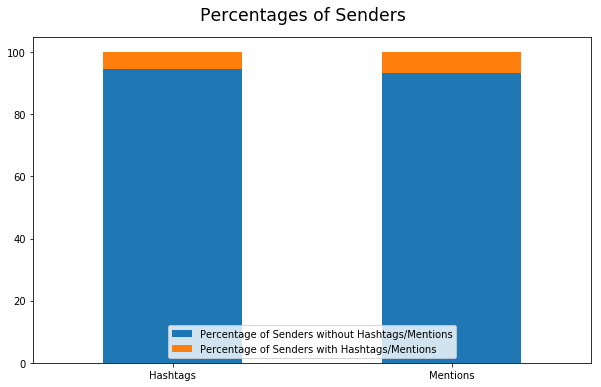

In [16]:
ax=df.plot.bar(stacked=True,figsize=(10,6),rot=0); 
labels=["Hashtags","Mentions"] 
ax.set_xticklabels(labels, rotation=0);
plt.legend(loc=8);
# x=0.5, y=1.05,
plt.suptitle('Percentages of Senders', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [17]:
dd={}
dd["Tweeple"]=[len(senders),nvm] #,nvr]
# len(set([u for u in exsm if u not in senders])),len(set([u for u in exsr if u not in senders]))]
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'Tweeple', 0: 'Tweeting Senders',1:"Mentioned Tweeple"}, inplace=True) #,2:"Retweeted Tweeple"
df

,Tweeple,Tweeting Senders,Mentioned Tweeple
0,Tweeple,1934,102


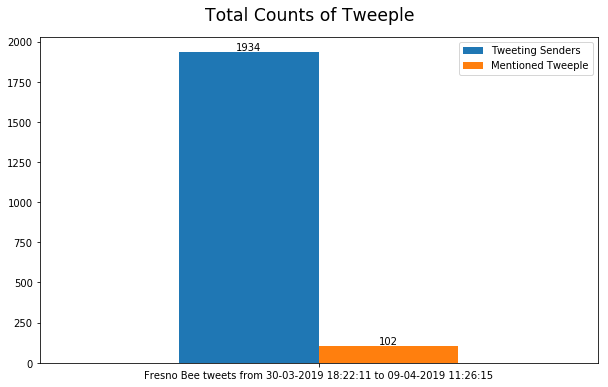

In [18]:
ax=df.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["Tweeting Senders", "Mentioned Tweeple"]) 
labels=[st+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts of Tweeple', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [19]:
lmt=mt["lang"].tolist()
print "The most common languages are the following", len(sorted(set(lmt)))
for i in sorted(set(lmt)):
    print i
x=Counter(mt["lang"].tolist())
x=x.most_common()
x

The most common languages are the following 8
en
es
fr
ht
in
it
pt
und


[(u'en', 2151),
 (u'und', 7),
 (u'fr', 4),
 (u'in', 2),
 (u'es', 2),
 (u'pt', 1),
 (u'it', 1),
 (u'ht', 1)]

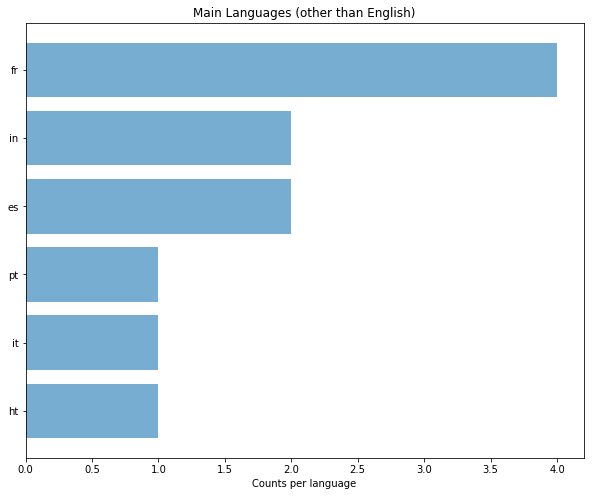

In [20]:
x=x[2:]
keys = [i for (i,j) in x] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x] 
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per language')
plt.title('Main Languages (other than English)')
plt.show()

In [23]:
mhashtags=[i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl]
x=Counter(mhashtags)
x=x.most_common()
xx=[(i,j) for (i,j) in x if j>0] # if j>4]
xx

[(u'yachtcocaineprostitutes', 63),
 (u'fresno', 11),
 (u'streisandeffect', 6),
 (u'journalism', 4),
 (u'devinnunesisanidiot', 4),
 (u'dualenrollment', 3),
 (u'resist', 3),
 (u'devinnunescow', 3),
 (u'uav', 2),
 (u'democrats', 2),
 (u'nunes', 2),
 (u'renewable', 2),
 (u'indivisible', 2),
 (u'ripnipsy', 2),
 (u'drone', 2),
 (u'progressives', 2),
 (u'factshurt', 1),
 (u'trump', 1),
 (u'humantrafficking', 1),
 (u'politics', 1),
 (u'kidney', 1),
 (u'mustread', 1),
 (u'dumbpeopletown', 1),
 (u'nyt', 1),
 (u'hatehaters', 1),
 (u'devinnunes', 1),
 (u'fresnobee', 1),
 (u'newsandnewsmedia', 1),
 (u'breakingnews', 1),
 (u'robots', 1),
 (u'thankajournalist', 1),
 (u'california', 1),
 (u'news', 1),
 (u'maga', 1),
 (u'feedly', 1),
 (u'smartnews', 1),
 (u'kissofdeath', 1),
 (u'equalpayday', 1)]

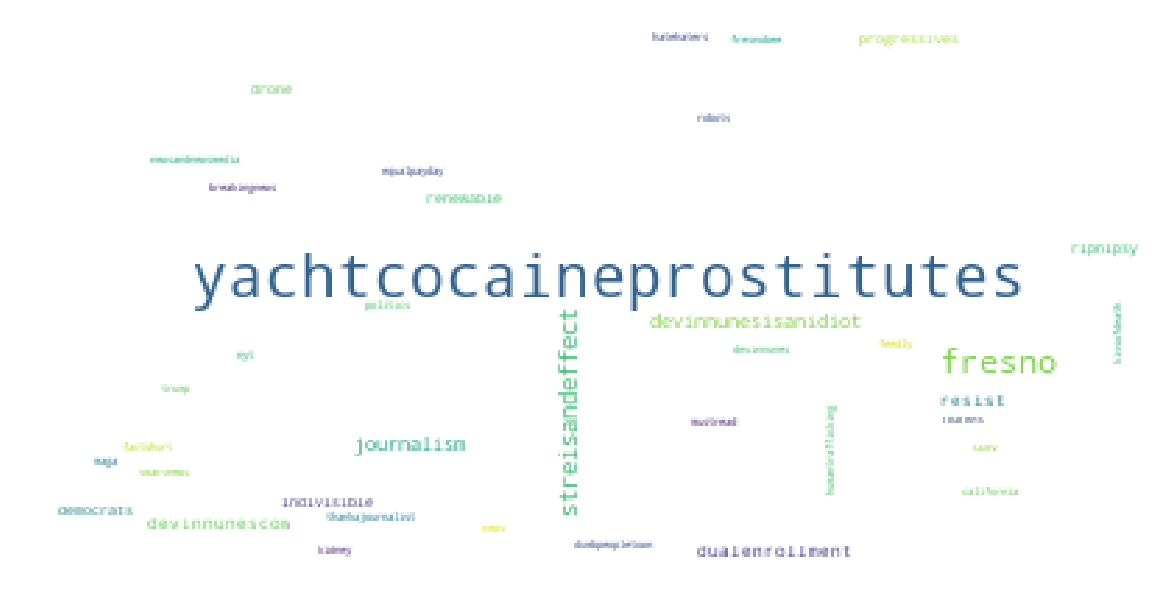

In [24]:
t=[]
for (i,j) in x:
    for k in range(j):
        t.append(i)
tt=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white").generate(tt) #,width=200, height=200
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud);
plt.axis("off");

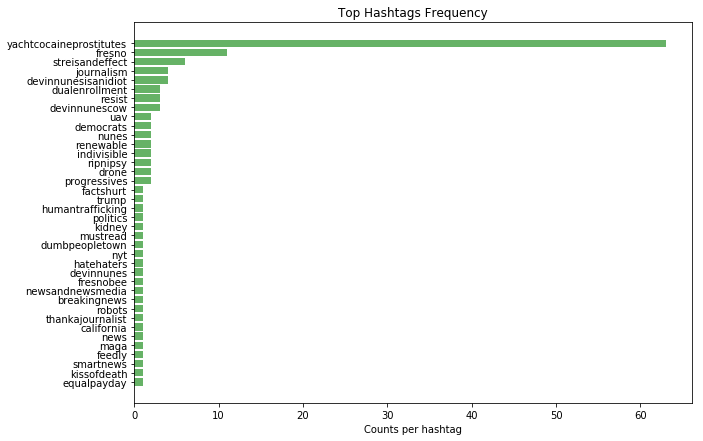

In [25]:
keys = [i for (i,j) in xx] #x.keys()
y_pos = np.arange(len(keys))
performance = [j for (i,j) in xx] #[x[k] for k in keys]
plt.figure(figsize=(10,7))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', color="g",alpha=0.6) #xerr=error, 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per hashtag')
plt.title('Top Hashtags Frequency')
plt.show()

## 2. Timeseries of Tweets, Teeple, Hashtags & Mentions

In [29]:
day = [' '.join(item.split(" ")[1:3]) for item in mt['created_at'].values] 
mt['time'] = day
mt
# time = [item.split(" ")[3] for item in mt['created_at'].values] 
# hour = [item.split(":")[0] for item in time]
# mt['time'] = hour
# mt

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date,time
2168,1112057447105986560,Sat Mar 30 18:22:11 +0000 2019,RichdeGive,[],"[TheAndyKatz, SJSU]",en,@TheAndyKatz @SJSU Keep thinking about how muc...,2019-03-30 18:22:11,Mar 30
2167,1112089847576100865,Sat Mar 30 20:30:55 +0000 2019,TraffickStop101,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-30 20:30:55,Mar 30
2166,1112090058675372033,Sat Mar 30 20:31:46 +0000 2019,VOL4KIDS,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-30 20:31:46,Mar 30
2165,1112093559065317378,Sat Mar 30 20:45:40 +0000 2019,overbeingnice,[],[DogginTrump],en,RT @DogginTrump: How dare you people keep send...,2019-03-30 20:45:40,Mar 30
2164,1112208787241385986,Sun Mar 31 04:23:33 +0000 2019,VOL4KIDS,[],NaN,en,Sex slaves live among us in Fresno. Mayor’s ne...,2019-03-31 04:23:33,Mar 31
2163,1112220626377334784,Sun Mar 31 05:10:36 +0000 2019,DebraTheis,[],[VOL4KIDS],en,RT @VOL4KIDS: Sex slaves live among us in Fres...,2019-03-31 05:10:36,Mar 31
2162,1112227158028513280,Sun Mar 31 05:36:33 +0000 2019,YankeesNewsFeed,[],NaN,en,Aaron Judge is officially larger than life. An...,2019-03-31 05:36:33,Mar 31
2161,1112300639126614016,Sun Mar 31 10:28:32 +0000 2019,ShoresConnect,[],NaN,en,St Clair Shores: Ypsilanti Lincoln’s Bates AP...,2019-03-31 10:28:32,Mar 31
2160,1112310198151143425,Sun Mar 31 11:06:31 +0000 2019,VOL4KIDS,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-31 11:06:31,Mar 31
2159,1112311181404975104,Sun Mar 31 11:10:26 +0000 2019,TraffickStop101,[],NaN,en,Mayor Brand’s human trafficking initiative con...,2019-03-31 11:10:26,Mar 31


In [46]:
hhd={}
for h in set(mt.time.values):
    df=mt.loc[mt['time'] == h]
    t=[]
    for i in range(len(df)):
        for ht in df.hashtags_list.values:
            if ht not in t:
                t.append(ht)
    hhd[h]=len(t)
# hhd={u'05': 53,
#  u'06': 105,
#  u'07': 95,
#  u'08': 104,
#  u'09': 116,
#  u'10': 119,
#  u'11': 43}
hashtags_per_hour=pd.DataFrame(hhd.items(), columns=['day', 'Number_of_hashtags'])
hashtags_per_hour.sort_values(by='day') #'hour')

,day,Number_of_hashtags
8,Apr 01,3
7,Apr 02,4
6,Apr 03,4
5,Apr 04,2
4,Apr 05,6
3,Apr 06,1
2,Apr 07,2
1,Apr 08,2
0,Apr 09,18
9,Mar 30,1


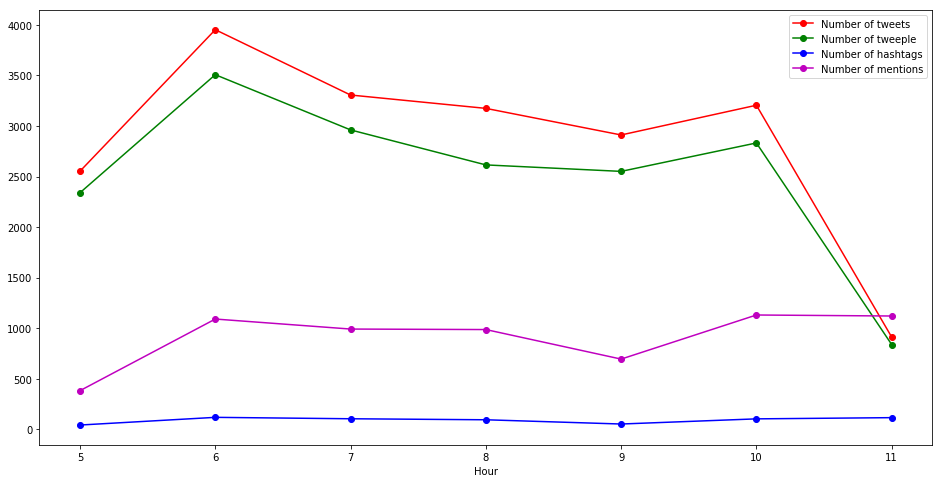

In [27]:
tweets_per_hour = mt[['time', 'created_at']].groupby('time').count()
tweets_per_hour=tweets_per_hour.rename(columns={"created_at": "Number_of_tweets",'time':'hour'})
tweets_per_hour['hour']=tweets_per_hour.index
X=[int(x) for x in tweets_per_hour['hour'].tolist()]
Y=tweets_per_hour['Number_of_tweets'].tolist()

tweeple_per_hour = mt[['time', 'screen_name']].groupby('time').nunique()
tweeple_per_hour=tweeple_per_hour.rename(columns={"screen_name": "Number_of_tweeple",'time':'hour'})
tweeple_per_hour['hour']=tweeple_per_hour.index
Z=tweeple_per_hour['Number_of_tweeple'].tolist()

hashtags_per_hour['hour']=hashtags_per_hour.index
U=hashtags_per_hour['Number_of_hashtags'].tolist()

mentions_per_hour['hour']=mentions_per_hour.index
W=mentions_per_hour['Number_of_mentions'].tolist()

plt.figure(figsize=(16,8))
plt.plot(X,Y, "ro-",label='Number of tweets'); 
plt.plot(X,Z, "go-",label='Number of tweeple'); 
plt.plot(X,U, "bo-",label='Number of hashtags'); 
plt.plot(X,W, "mo-",label='Number of mentions'); 
plt.legend(loc='upper right');
plt.xlabel("Hour");

## 3. Graph of Co-Occurring Hashtags

In [28]:
heds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['hashtags_list']
    if type(iterable)!=float:
        if len(iterable)>1:
            for j in itertools.combinations(iterable, 2):
                heds.append((j[0],j[1],mt.iloc[i]['date']))
print "Number of multi-hashtag-cooccurrences:"
print "%i nonunique (%i unique)" %(len(heds),len(set(heds)))

Number of multi-hashtag-cooccurrences:
1073 nonunique (1072 unique)


In [29]:
G=nx.MultiGraph()
for k,v in dict(Counter(heds)).items():
    G.add_edge(k[0],k[1],date=k[2])
print len(G.nodes()),len(G.edges())
if nx.is_connected(G)==True:
    print "This multigraph is connected"
else:
    print "This multigraph is not connected and has", nx.number_connected_components(G), "connected components"
Gl = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
Gc=G.subgraph(Gl[0])
print 'The largest connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

355 1072
This multigraph is not connected and has 56 connected components
The largest connected component has:
211 nodes and 843 edges


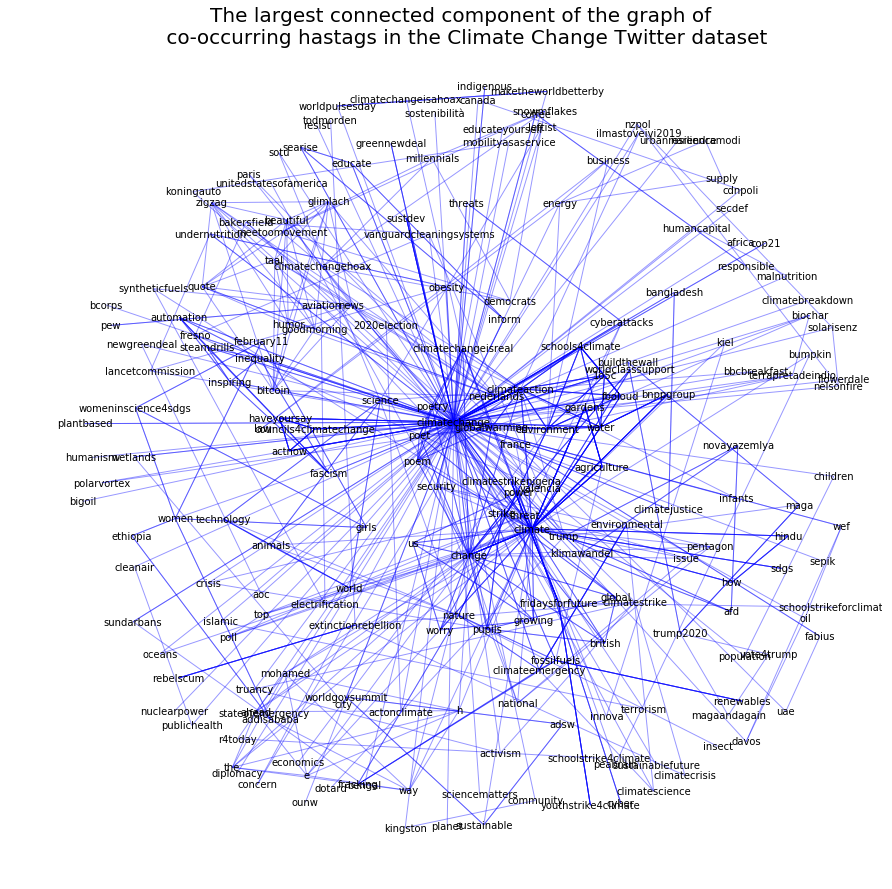

In [30]:
pos=nx.spring_layout(Gc,k=0.7) #graphviz_layout(Gc)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="b", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,font_size=10)
plt.axis('off');
sst="The largest connected component of the graph of \n co-occurring hastags in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

## 4. Graph of Mention-ing/-ed Tweeple

In [31]:
meds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['mentions_list']
    if type(iterable)!=float:
        for k in iterable:
            meds.append((mt.iloc[i]['screen_name'],k,mt.iloc[i]['date']))
print "Number of multi-mentions among tweeple:"
print "%i nonunique (%i unique)" %(len(meds),len(set(meds)))

Number of multi-mentions among tweeple:
23427 nonunique (23396 unique)


In [32]:
G=nx.MultiDiGraph()
for k,v in dict(Counter(meds)).items():
    G.add_edge(k[0],k[1],date=k[2])
print len(G.nodes()),len(G.edges())
if nx.is_weakly_connected(G)==True:
    print "This multigraph is weakly connected"
else:
    print "This multigraph is not weakly connected and has", nx.number_weakly_connected_components(G), "weakly connected components"
Gl = sorted(nx.weakly_connected_component_subgraphs(G), key = len, reverse=True)
# for i in range(len(Gl)):
#     if len(Gl[i].nodes())<70 and len(Gl[i].nodes())>20:
#         print i
Gc=G.subgraph(Gl[0])
print 'The largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

18087 23396
This multigraph is not weakly connected and has 1113 weakly connected components
The largest weakly connected component has:
14470 nodes and 20493 edges


In [33]:
# pos=nx.spring_layout(Gc,k=0.7) #graphviz_layout(Gc)
# plt.figure(figsize=(15,15));
# nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
# nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="r", alpha=0.4)
# # nx.draw_networkx_labels(Gc, pos,font_size=10)
# plt.axis('off');
# sst="The largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
# plt.title(sst,fontsize=20);

In [34]:
Gc=G.subgraph(Gl[4])
print 'The fifth largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

The fifth largest weakly connected component has:
34 nodes and 39 edges


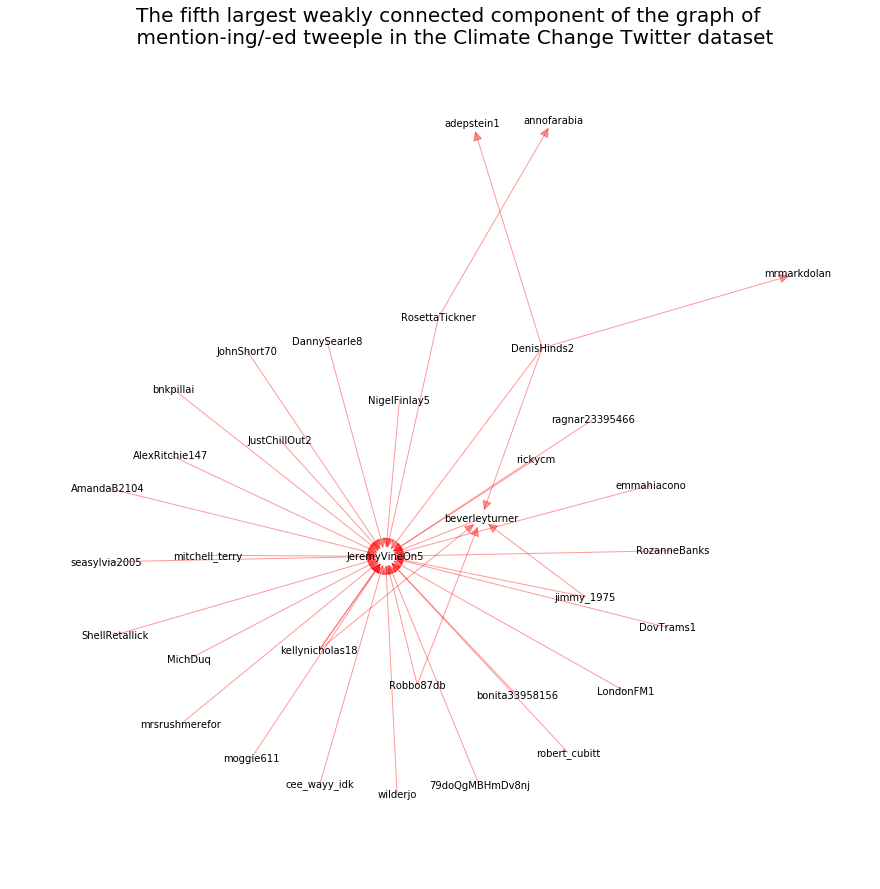

In [35]:
pos=graphviz_layout(Gc)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="r", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,font_size=10)
plt.axis('off');
sst="The fifth largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);